In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models.word2vec import Word2Vec

In [3]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/Users/davidmcclure/Projects/hist-vec/data/models/{}.bin'.format(year)))
    for year in range(1820, 1940, 20)
])

In [4]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [5]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

/Users/davidmcclure/Projects/hist-vec/env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

littérature


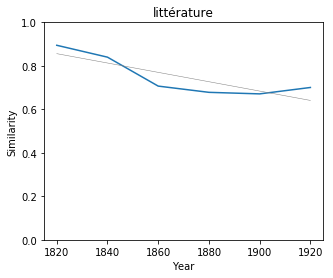

In [8]:
plot_cosine_series('poésie', 'littérature',)

In [9]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

In [10]:
union_vocab = union_neighbor_vocab('poésie')

In [11]:
data = []
for token in union_vocab:
    
    series = cosine_series('poésie', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [12]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [13]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
310,humanisme,0.007576,0.006574
60,apport,0.007097,0.008250
174,orientation,0.006795,0.007774
269,concept,0.006403,0.000870
227,lyrisme,0.006172,0.010698
441,rythme,0.006073,0.012454
568,éthique,0.005922,0.037276
54,evolution,0.005841,0.010722
132,mentalité,0.005815,0.043735
122,théoricien,0.005749,0.003356


humanisme


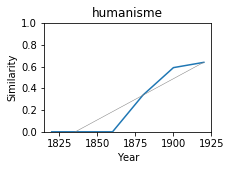

apport


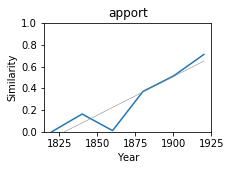

orientation


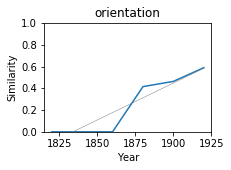

concept


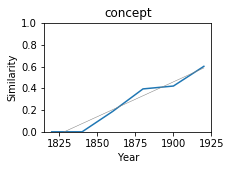

lyrisme


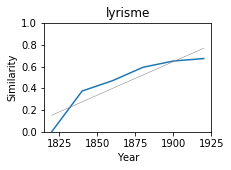

rythme


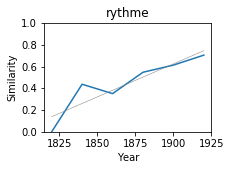

éthique


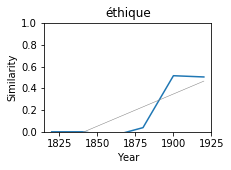

evolution


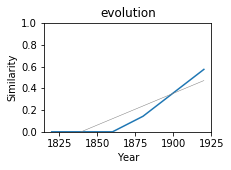

mentalité


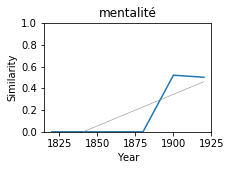

théoricien


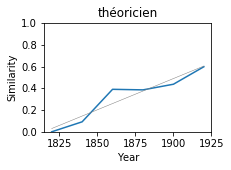

réaliste


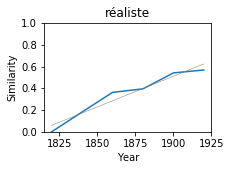

déformation


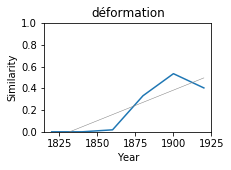

évoluer


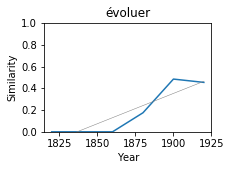

conscient


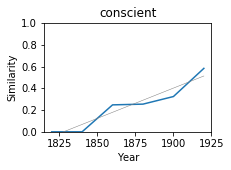

schéma


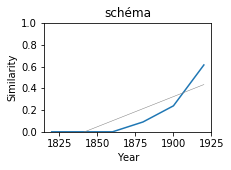

adaptation


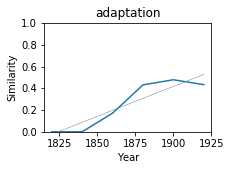

ampleur


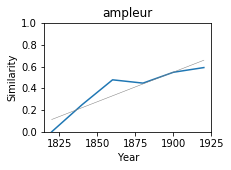

réalisme


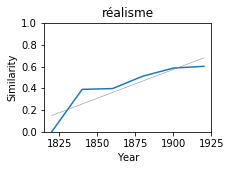

conventionnel


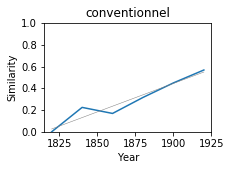

symboliste


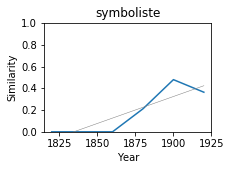

In [15]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('poésie', row['token'], 3, 2)

# Decreasing

In [16]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
119,mètre,-0.006329,0.009419
579,cultivé,-0.005480,0.031119
537,cours,-0.005196,0.002895
285,âge,-0.005143,0.010004
254,pélasges,-0.005023,0.030449
286,fétichisme,-0.004886,0.060112
162,inhérent,-0.004774,0.064054
293,spectacle,-0.004656,0.079297
509,classe,-0.004547,0.138132
297,opéra,-0.004526,0.043752


mètre


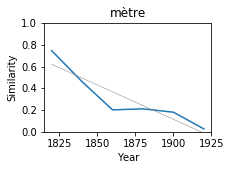

cultivé


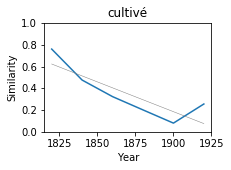

cours


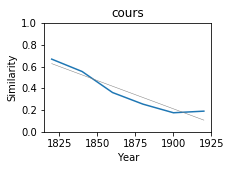

âge


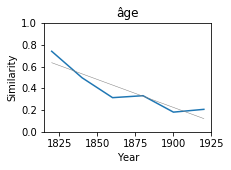

pélasges


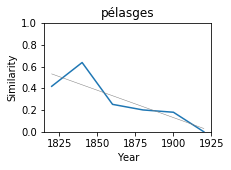

fétichisme


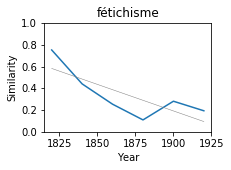

inhérent


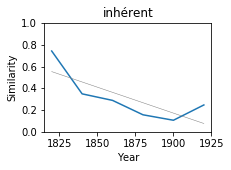

spectacle


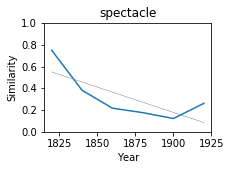

classe


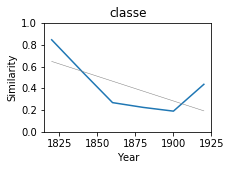

opéra


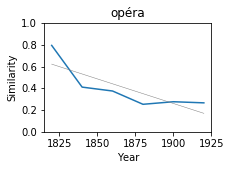

fermentation


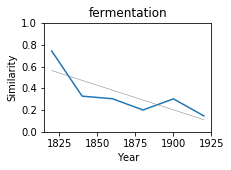

dépravation


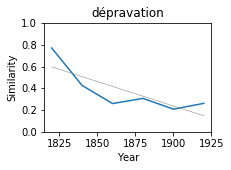

ancien


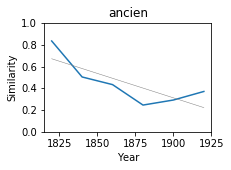

social


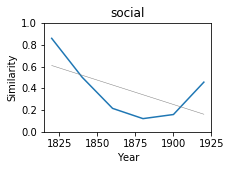

traducteur


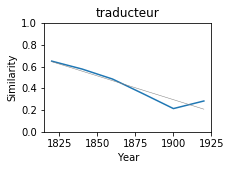

ordinaire


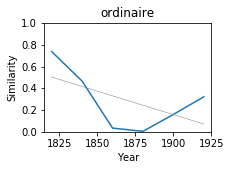

restreint


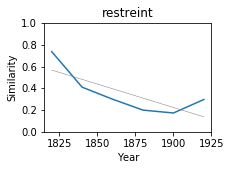

politique


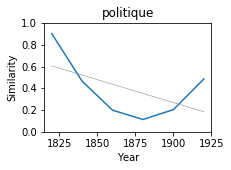

réunion


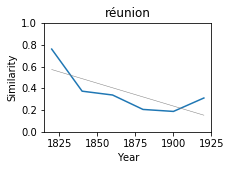

morale


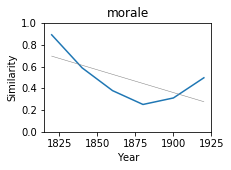

In [18]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('poésie', row['token'], 3, 2)

In [19]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [20]:
intersect_vocab = intersect_neighbor_vocab('poésie')

In [21]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('poésie', token)
    fit = lin_reg(series)
    
    if fit.pvalues[1] < 0.05:
        data.append((token, fit.params[1], fit.pvalues[1]))

In [22]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [23]:
df2.sort_values('slope', ascending=False)

,token,slope,p
7,musique,0.002105,0.016677
5,légende,0.001422,0.036953
34,région,-0.001302,0.038125
31,pureté,-0.001573,0.014466
30,traduction,-0.001617,0.004221
25,bible,-0.001677,0.032617
11,langue,-0.001757,0.017921
0,chronique,-0.001794,0.037815
21,narration,-0.001810,0.019385
29,génie,-0.001988,0.024957


musique


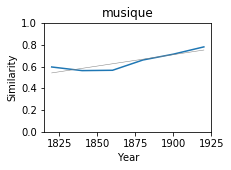

légende


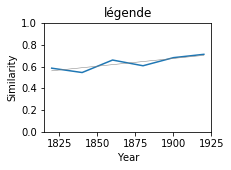

région


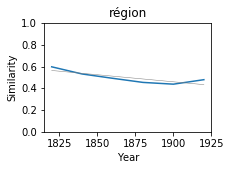

pureté


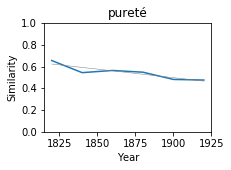

traduction


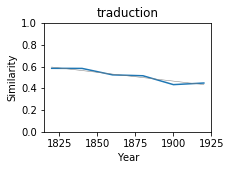

bible


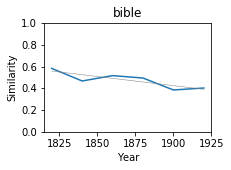

langue


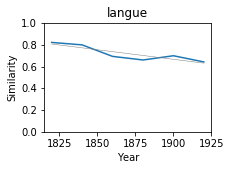

chronique


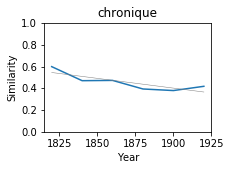

narration


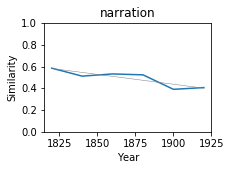

génie


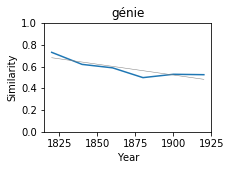

merveille


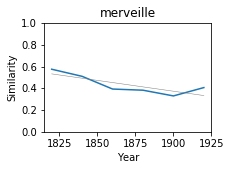

pittoresque


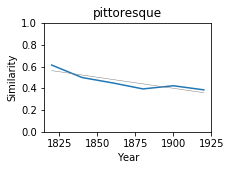

antiquité


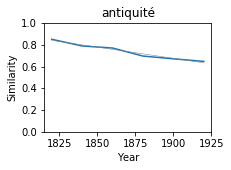

poète


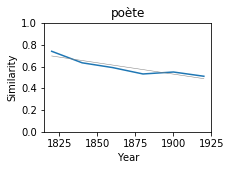

appréciation


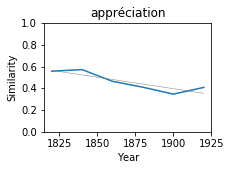

littérature


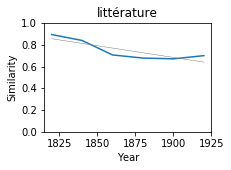

véritablement


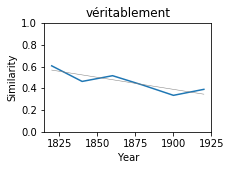

ode


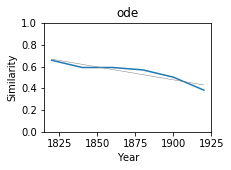

période


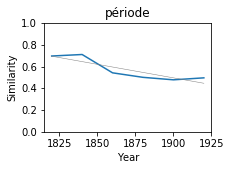

modèle


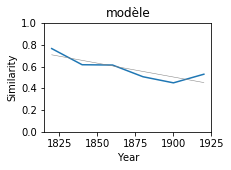

dialecte


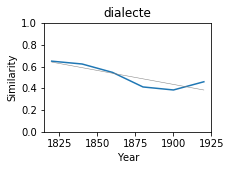

idiome


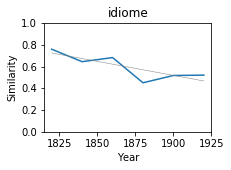

éloquence


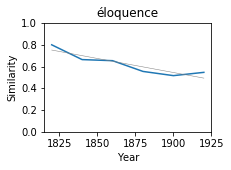

antique


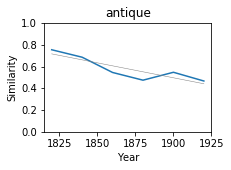

grèce


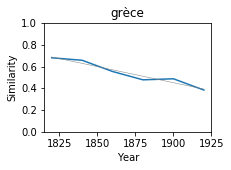

puiser


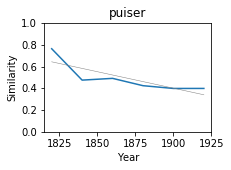

monument


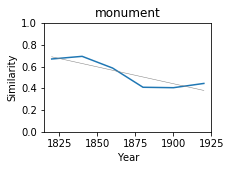

chevalerie


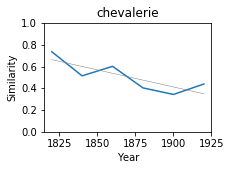

fable


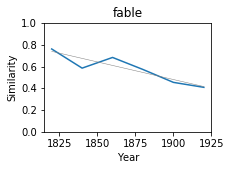

prononciation


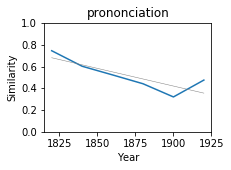

récit


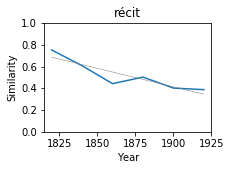

homère


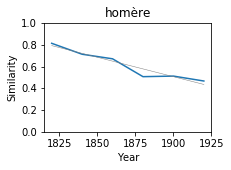

vraiment


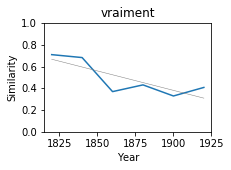

tragique


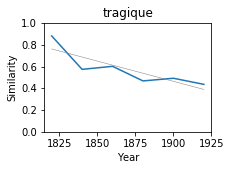

dramatique


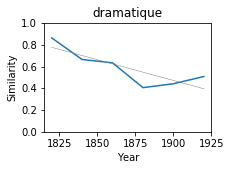

In [24]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('poésie', row['token'], 3, 2)